In [1]:
layer_output = [4.8, 1.21, 2.385]

#e = euler constant value 2.7182812846

E = 2.7182812846

#calculating the exponentian values for each vector
exp_values = []
for output in layer_output:
    exp_values.append(E ** output)
    
print('exponential values: ', exp_values)


exponential values:  [121.51030082529036, 3.353483840703205, 10.859057483217281]


In [2]:
#adding the sum and normalization to the code:

#normalizing the values

norm_base = sum(exp_values) #sum all above exp_values- 121.51... + 3.35... + 10.85...
#print(norm_base)

norm_values = []
for value in exp_values:
    norm_values.append(value / norm_base)
    
print('Normalized expontial values: ', norm_values)
print('Sum of normalized values: ', sum(norm_values))

Normalized expontial values:  [0.89528261345798, 0.024708323135588742, 0.08000906340643134]
Sum of normalized values:  1.0000000000000002


In [3]:
#using numpy:

import numpy as np

layer_outputs = [4.8, 1.21, 2.385]

exp_values = np.exp(layer_outputs)
print('The exponential values is: ', exp_values)

#normalize values
norm_values = exp_values / np.sum(exp_values)
print(norm_values)

print('Sum of normalized values: ', np.sum(norm_values))


The exponential values is:  [121.51041752   3.35348465  10.85906266]
[0.89528266 0.02470831 0.08000903]
Sum of normalized values:  0.9999999999999999


In [4]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
                         [8.9, -1.81, 0.2],
                         [1.41, 1.051, 0.026]])

#axis1 - refers column and axis0 - refers rows
print('The sum of axis 1 is : ')
print(np.sum(layer_outputs, axis = 1, keepdims = True))

The sum of axis 1 is : 
[[8.395]
 [7.29 ]
 [2.487]]


In [5]:
"""
1. With this we keep the same dimension as the input.
2. now if we divide the array containing a batch of the outputs with this array, Numpy will perform this sample-wise.
3. This means, divide all values from each output row by the corresponding row from the sum array.
4. Since this sum in each row is a single value, it will be used for the division with every value from the corresponding output row.
"""

#combining this with softmax class like:

#softmax activation
class Activation_Softmax:
    
    #forward pass
    def forward(self, layer_outputs):
        # Stabilize computation by subtracting the maximum value in each row from the output
        exp_values = np.exp(layer_outputs - np.max(layer_outputs, axis = 1, keepdims = True))
        
        #normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
        
        self.output = probabilities
        
#test the activation_softmax class
layer_outputs = np.array([[4.8, 1.21, 2.385],
                          [8.9, -1.81, 0.2],
                          [1.41, 1.051, 0.026]])

#initialize the softmax activation
activation = Activation_Softmax()

#apply the forward pass
activation.forward(layer_outputs)

#print the computed softmax probabilities
print("softmax probabilities:\n ",activation.output)
    
#verifying the results
print('If all 1, its verified:\n', np.sum(activation.output, axis = 1))

softmax probabilities:
  [[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]
If all 1, its verified:
 [1. 1. 1.]


In [6]:
"""
Two main pervasive challenges with neural network: dead neurons and exploding values
They can wreak havoc down the line and render a network useless over time.

"""
print(np.exp(1))

print(np.exp(10))

print(np.exp(100))

print(np.exp(1000)) # RuntimeWarning: overflow encountered in exp cause it exceed the range that can be represented by NumPy's floating-point numbers (usually float64).

#this can be solved by following property:
"""
np.exp(-np.inf) mathematically evaluates to 0.

np.exp(0) mathematically evaluates to 1.)

"""
print(np.exp(-np.inf), np.exp(0))




2.718281828459045
22026.465794806718
2.6881171418161356e+43
inf
0.0 1.0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_12576\2160490970.py:12: RuntimeWarning: overflow encountered in exp
  print(np.exp(1000)) # RuntimeWarning: overflow encountered in exp cause it exceed the range that can be represented by NumPy's floating-point numbers (usually float64).


In [7]:
pip install nnfs

Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

class Activation_ReLU:
    def forward(self, inputs):
        #calculating the outputs from the inputs
        self.output = np.maximum(0, inputs)
    
class Activation_Softmax:
    #def forward pass
    def forward(self, inputs):
        #get unnormalized probabilities
        exp_values = np.exp(inputs - np.max(inputs, axis = 1, keepdims = True))
        
        #normalize them for each sample
        probabilities = exp_values / np.sum(exp_values, axis = 1, keepdims = True)
        
        self.output = probabilities
    
#dense layer class
class Dense_Layer:
    #initializing the layer
    def __init__(self, n_inputs, n_neurons):
        self.weights = 0.01 * np.random.randn(n_inputs, n_neurons)
        self.biases = np.zeros((1, n_neurons))
        
    #forward pass    
    def forward(self, inputs):
        self.output = np.dot(inputs, self.weights) + self.biases
        
#create the dataset
X, y = spiral_data(samples = 100, classes = 3)

#create the dense layer with 2 inputs and 3 output values
dense1 = Dense_Layer(2, 3)

#create the relu activation function to use with dense layer
activation1 = Activation_ReLU()

#create the second dense layer with 3 input features(here we take the output of previous layer) and 3 output values
dense2 = Dense_Layer(3, 3)

#creating the softmax activation to use with dense layer
activation2 = Activation_Softmax()

#forward passing of our training through layer 1
dense1.forward(X)

#making the forward pass through ReLU activation function, here  it takes output of first dense layer
activation1.forward(dense1.output)

#making the forward pass through second layer- here it take output of ReLU activation as inputs
dense2.forward(activation1.output)

#making the forward pass through softmax activation which takes the output of second dense layer as input
activation2.forward(dense2.output)

print(activation2.output[:5])







[[0.33333334 0.33333334 0.33333334]
 [0.3333332  0.3333332  0.33333364]
 [0.3333329  0.33333293 0.3333342 ]
 [0.3333326  0.33333263 0.33333477]
 [0.33333233 0.3333324  0.33333528]]


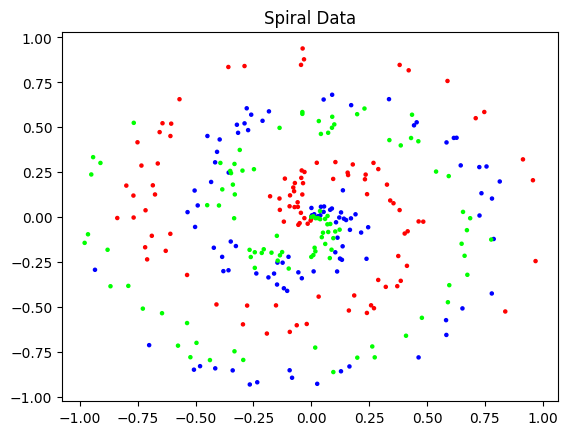

In [9]:
#visualizing the spiral_data:
import numpy as np
import nnfs
from nnfs.datasets import spiral_data

nnfs.init()

import matplotlib.pyplot as plt

X, y = spiral_data(samples = 100, classes = 3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg', s=5)
plt.title("Spiral Data")
plt.show()


